In [4]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from os import listdir
from os.path import isfile, join
from datetime import datetime
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Importing custom framework
import sys, os
sys.path.insert(0, os.path.abspath('../..'))
from data_split import prepare_data_waveform, plot_confusion_matrix

In [5]:
waveformPath = '../../merged/waveform.hdf5'

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_waveform(waveformPath, True)

<h2>Experiment 1</h2>

train accuracy score: 
0.26316666666666666
validation accuracy score: 
0.196


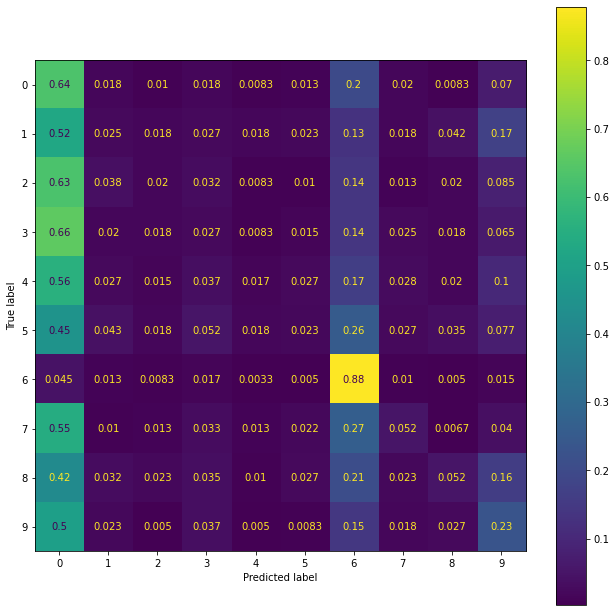

In [7]:
RF_model = RandomForestClassifier(min_samples_leaf=3, n_estimators=50, min_samples_split=10, max_features='sqrt', max_depth=6, random_state=0)
RF_model.fit(X_train, y_train)

print('train accuracy score: ')
print(RF_model.score(X_train, y_train))
print('validation accuracy score: ')
print(RF_model.score(X_val, y_val))

cm = confusion_matrix(y_true=y_val, y_pred=RF_model.predict(X_val))
plot_confusion_matrix(cm, cmap='plasma')

<h2>Experiment 2</h2>

train accuracy score: 
1.0
validation accuracy score: 
0.37283333333333335


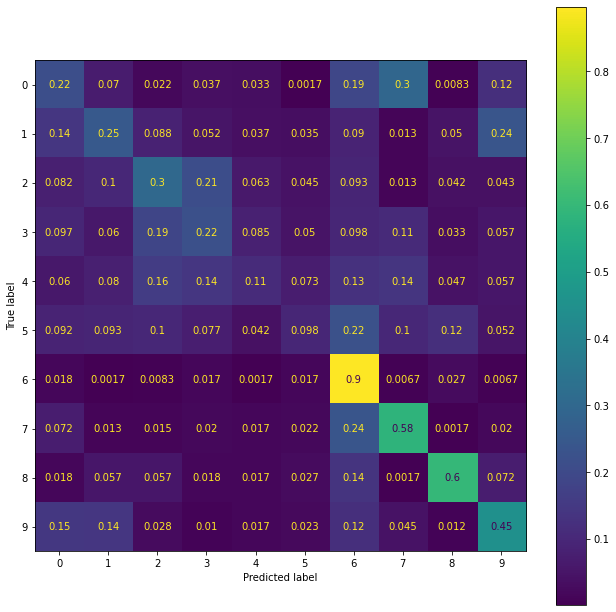

In [8]:
standard_model = RandomForestClassifier()
standard_model.fit(X_train, y_train)
print('train accuracy score: ')
print(standard_model.score(X_train, y_train))
print('validation accuracy score: ')
print(standard_model.score(X_val, y_val))

cm = confusion_matrix(y_true=y_val, y_pred=standard_model.predict(X_val))
plot_confusion_matrix(cm, cmap='plasma')

<h2>Experiment 3</h2>

train accuracy score: 
1.0
validation accuracy score: 
0.376


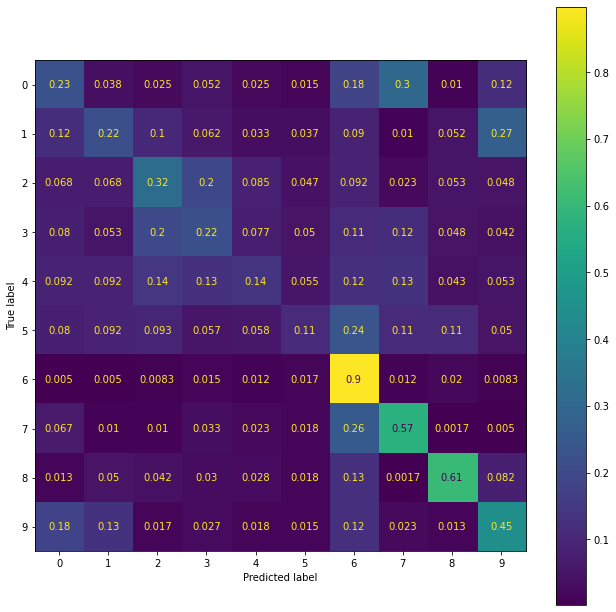

In [15]:
model3 = RandomForestClassifier(n_estimators=120)
model3.fit(X_train, y_train)
print('train accuracy score: ')
print(model3.score(X_train, y_train))
print('validation accuracy score: ')
print(model3.score(X_val, y_val))

cm = confusion_matrix(y_true=y_val, y_pred=model3.predict(X_val))
plot_confusion_matrix(cm, cmap='plasma')

In [16]:
print()
print('test accuracy score: ')
print(model3.score(X_test, y_test))


test accuracy score: 
0.4155
